# Joint plot

## Table of Contents

1. [Preparation](#preparation)

2. [Default Prezentation of Joint Plot](#default)

3. [Options](#options)

  3.1. [Change Geom Types](#change-geom)

  3.2. [Geometries Customization](#geom-customization)

  3.3. [Marginal Layers Customization](#marginal-customization)

  3.4. [Grouping](#grouping)

<a id="preparation"/>

## 1. Preparation

In [1]:
import pandas as pd

from lets_plot.bistro import *
from lets_plot import *


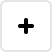
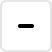
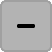
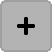
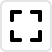
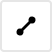
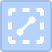
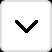
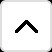
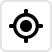

In [2]:
LetsPlot.setup_html()

In [3]:
def plot_matrix(plots=[], width=400, height=300, columns=2):
    bunch = GGBunch()
    for i in range(len(plots)):
        row = int(i / columns)
        column = i % columns
        bunch.add_plot(plots[i], column * width, row * height, width, height)
    return bunch.show()

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/iris.csv")
print(df.shape)
df.head()

(150, 5)


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

<a id="default"/>

## 2. Default Prezentation of Joint Plot

In [5]:
joint_plot(df, "petal_length", "petal_width")

<a id="options"/>

## 3. Options

<a id="change-geom"/>

### 3.1. Change Geom Types

In [6]:
joint_plot(df, "petal_length", "petal_width", geom='tile') + theme_bw()

In [7]:
joint_plot(df.dropna(), "petal_length", "petal_width", color_by="species", geom='density2d') + theme_bw()

<a id="geom-customization"/>

### 3.2. Geometries Customization

In [8]:
joint_plot(df, "petal_length", "petal_width", color="#756bb1", size=8, alpha=.5, se=False) + theme_bw()

In [9]:
joint_plot(df, "petal_length", "petal_width", geom='none', color="black", reg_line=False) + \
    geom_density2df(color="white", fill="#feb24c", size=.5, alpha=1/3) + \
    geom_point(size=5, shape=21, color="black", fill="#feb24c") + \
    theme_bw()

<a id="marginal-customization"/>

### 3.3. Marginal Layers Customization

In [10]:
joint_plot(df, "petal_length", "petal_width", color="black", marginal="box:lb:.03,hist:t:.4,hist:r") + \
    ggmarginal("tr", layer=geom_area(stat='density', color="magenta", fill="magenta", alpha=.1)) + \
    theme(axis_line_x='blank', axis_line_y='blank') + \
    theme_bw()

<a id="grouping"/>

### 3.4. Grouping

In [11]:
joint_plot(df, "petal_length", "petal_width", color_by="species", marginal="hist:tr") + theme_bw()

In [12]:
joint_plot(df, "petal_length", "petal_width", color_by="species") + facet_grid(x="species") + theme_bw()